# Assignment 9

a) Function to generate all pairs of queries and answers. Resultant dictionary "query_dict" has 20,000 queries with length = 5 and 20,000 answers with length = 4

In [78]:
import random
import numpy as np


def gen_query_answer():
    queries = {}
    for i in range(100):
        for j in range(100):
            query1 = str(i) + "+" + str(j)
            answer1 = i + j
            if answer1 >= 0:
                answer1 = "+" + str(answer1)
            else:
                answer1 = "-" + str(answer1)
            query2 = str(i) + "-" + str(j)
            answer2 = i - j
            if answer2 >= 0:
                answer2 = "+" + str(answer2)
            answer2 = str(answer2)
            while len(query1) != 5:
                query1 = query1 + " "
            while len(query2) != 5:
                query2 = query2 + " "
            while len(answer1) != 4:
                answer1 = answer1 + " "
            while len(answer2) != 4:
                answer2 = answer2 + " "
            queries[query1] = answer1
            queries[query2] = answer2
    return queries


query_dict = gen_query_answer()
print("Queries: ", len(query_dict.keys()), "\nAnswers: ", len(query_dict.values()))


Queries:  20000 
Answers:  20000


b) Function that encodes input string into one-hot encoding scheme. Dimension of query matrix = 5 X 13, and dimension of answer matrix = 4 X 13

In [79]:
alphabet = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "+", "-", " "]


def one_hot_encode(sequences, dimension=len(alphabet)):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, alphabet.index(sequence)] = 1
    return results


def get_dataset(query_dict):
    results_queries = []
    results_answers = []
    for query in query_dict.keys():
        result_query = one_hot_encode(query)
        results_queries.append(result_query)
    for answer in query_dict.values():
        result_answer = one_hot_encode(answer)
        results_answers.append(result_answer)
    return results_queries, results_answers

query_matrices, answer_matrices = get_dataset(query_dict)
query_matrices = np.array(query_matrices)
answer_matrices = np.array(answer_matrices)
print("Query matrix: ", query_matrices[0].shape, "\nAnswer matrix: ", answer_matrices[0].shape)


Query matrix:  (5, 13) 
Answer matrix:  (4, 13)


c) Explaining the below code:
1. The model created below uses LSTM layers from keras. 
2. There are 2 LSTM layers in this model, one for the encoder and one for the decoder. 
3. The first LSTM layer, aka the encoder, takes the input shape of 5 X 13, i.e., our query_matrix and gives a vector having a fixed size as the output.
4. The second LSTM layer, aka the decoder, takes the vector having a fixed size and reads it and passes it onto the Dense layer.
5. The Dense layer outputs a vector having an expected dimension of 13 with softmax activation applied.
6. The layer between the encoder and decoder is the RepeatVector layer. This layer connects the encoder to the decoder. The encoder outputs a 2D vector and the decoder expects a 3D sequence. To bridge this gap, the RepeatVector layer solves this problem by repeating the 2D vector to obtain a 3D sequence.

In [50]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, RepeatVector
import tensorflow as tf

model = Sequential()
model.add(LSTM(128, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(13, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


d) Shuffling the dataset using sklearn's train_test_split. Below code gives 70% of the dataset as train_set, 15% as validation_set and 15% as test_set
For 5 iterations, with different batch_size and epochs = 50, it is found that 143 batch_size gives highest val_accuracy = 99.87%
Test accuracy obtained is 99.83% for batch_size 143

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(query_matrices, answer_matrices, test_size=0.3, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, shuffle=True)

for iteration in range(5):
    batch_no = random.randint(35,150)
    print(f"Batch size={batch_no}")
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = batch_no, epochs = 50)


Batch size=74
Epoch 1/50
190/190 [==============================] - 8s 29ms/step - loss: 1.4306 - accuracy: 0.5202 - val_loss: 1.1559 - val_accuracy: 0.5788
Epoch 2/50
190/190 [==============================] - 5s 24ms/step - loss: 0.9727 - accuracy: 0.6343 - val_loss: 1.0624 - val_accuracy: 0.6275
Epoch 3/50
190/190 [==============================] - 4s 22ms/step - loss: 0.8446 - accuracy: 0.6812 - val_loss: 0.8879 - val_accuracy: 0.6689
Epoch 4/50
190/190 [==============================] - 5s 24ms/step - loss: 0.7702 - accuracy: 0.7085 - val_loss: 0.8402 - val_accuracy: 0.6904
Epoch 5/50
190/190 [==============================] - 4s 23ms/step - loss: 0.6450 - accuracy: 0.7533 - val_loss: 0.6083 - val_accuracy: 0.7645
Epoch 6/50
190/190 [==============================] - 5s 24ms/step - loss: 0.4437 - accuracy: 0.8313 - val_loss: 0.3979 - val_accuracy: 0.8508
Epoch 7/50
190/190 [==============================] - 6s 29ms/step - loss: 0.2808 - accuracy: 0.8942 - val_loss: 0.4751 - val_ac

Epoch 8/50
116/116 [==============================] - 5s 42ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0112 - val_accuracy: 0.9971
Epoch 9/50
116/116 [==============================] - 5s 40ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0120 - val_accuracy: 0.9974
Epoch 10/50
116/116 [==============================] - 5s 44ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0227 - val_accuracy: 0.9951
Epoch 11/50
116/116 [==============================] - 5s 45ms/step - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0092 - val_accuracy: 0.9969
Epoch 12/50
116/116 [==============================] - 5s 40ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.0137 - val_accuracy: 0.9963
Epoch 13/50
116/116 [==============================] - 4s 38ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0390 - val_accuracy: 0.9923
Epoch 14/50
116/116 [==============================] - 4s 38ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.0109 - val_accuracy: 0

Epoch 15/50
110/110 [==============================] - 6s 51ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0080 - val_accuracy: 0.9977
Epoch 16/50
110/110 [==============================] - 6s 51ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0162 - val_accuracy: 0.9971
Epoch 17/50
110/110 [==============================] - 6s 54ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.0104 - val_accuracy: 0.9973
Epoch 18/50
110/110 [==============================] - 5s 47ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0088 - val_accuracy: 0.9987
Epoch 19/50
110/110 [==============================] - 6s 51ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0299 - val_accuracy: 0.9954
Epoch 20/50
110/110 [==============================] - 6s 54ms/step - loss: 0.0063 - accuracy: 0.9988 - val_loss: 0.0161 - val_accuracy: 0.9968
Epoch 21/50
110/110 [==============================] - 5s 49ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0165 - val_accuracy:

Epoch 22/50
334/334 [==============================] - 10s 29ms/step - loss: 0.0103 - accuracy: 0.9979 - val_loss: 0.0130 - val_accuracy: 0.9970
Epoch 23/50
334/334 [==============================] - 10s 30ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.0170 - val_accuracy: 0.9964
Epoch 24/50
334/334 [==============================] - 10s 29ms/step - loss: 0.0120 - accuracy: 0.9976 - val_loss: 0.0120 - val_accuracy: 0.9967
Epoch 25/50
334/334 [==============================] - 10s 30ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.0122 - val_accuracy: 0.9973
Epoch 26/50
334/334 [==============================] - 10s 30ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.0203 - val_accuracy: 0.9951
Epoch 27/50
334/334 [==============================] - 10s 29ms/step - loss: 0.0109 - accuracy: 0.9976 - val_loss: 0.0208 - val_accuracy: 0.9958
Epoch 28/50
334/334 [==============================] - 10s 31ms/step - loss: 0.0113 - accuracy: 0.9979 - val_loss: 0.0228 - val_ac

98/98 [==============================] - 7s 67ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0140 - val_accuracy: 0.9979
Epoch 30/50
98/98 [==============================] - 6s 65ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0131 - val_accuracy: 0.9971
Epoch 31/50
98/98 [==============================] - 8s 79ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0069 - val_accuracy: 0.9987
Epoch 32/50
98/98 [==============================] - 8s 81ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0143 - val_accuracy: 0.9978
Epoch 33/50
98/98 [==============================] - 8s 85ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0205 - val_accuracy: 0.9973
Epoch 34/50
98/98 [==============================] - 7s 74ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0060 - val_accuracy: 0.9988
Epoch 35/50
98/98 [==============================] - 6s 65ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0116 - val_accuracy: 0.9977
Epoch 36/50
98/98 

In [54]:
results = model.evaluate(x_test, y_test)
print(f"Accuracy: {round(results[1]*100,2)}")

94/94 [==============================] - 1s 6ms/step - loss: 0.0097 - accuracy: 0.9983
Accuracy: 99.83


e) Reversing the string in the dataset and creating one-hot encodings for the new dataset. Then, using batch_size = 143 and the same hyperparameters as before, training the model.
The val_accuracy is 99.93% and test accuracy for the model with revered dataset is 99.97%.

In [80]:
rev_query_dict = {}
for query, answer in query_dict.items():
    rev_query = query[::-1]
    rev_answer = answer[::-1]
    rev_query_dict[rev_query] = rev_answer

print(f"Original query: '{list(query_dict)[569]}', Reversed query: '{list(rev_query_dict)[569]}'")
print(f"Original answer: '{query_dict[list(query_dict)[569]]}', Reversed answer: '{rev_query_dict[list(rev_query_dict)[569]]}'")

rev_query_matrices, rev_answer_matrices = get_dataset(rev_query_dict)
rev_query_matrices = np.array(query_matrices)
rev_answer_matrices = np.array(answer_matrices)
print("Reverse query matrix: ", rev_query_matrices[0].shape, "\nReverse answer matrix: ", rev_answer_matrices[0].shape)


from sklearn.model_selection import train_test_split
rev_x_train, rev_x_test, rev_y_train, rev_y_test = train_test_split(rev_query_matrices, rev_answer_matrices, test_size=0.3, shuffle=True)
rev_x_test, rev_x_val, rev_y_test, rev_y_val = train_test_split(rev_x_test, rev_y_test, test_size=0.5, shuffle=True)

history1 = model.fit(rev_x_train, rev_y_train, validation_data=(rev_x_val, rev_y_val), batch_size = 143, epochs = 50)
results1 = model.evaluate(rev_x_test, rev_y_test)
print(f"Accuracy: {round(results1[1]*100,2)}")

Original query: '2-84 ', Reversed query: ' 48-2'
Original answer: '-82 ', Reversed answer: ' 28-'
Reverse query matrix:  (5, 13) 
Reverse answer matrix:  (4, 13)
Epoch 1/50
98/98 [==============================] - 5s 47ms/step - loss: 0.5647 - accuracy: 0.9464 - val_loss: 0.0250 - val_accuracy: 0.9919
Epoch 2/50
98/98 [==============================] - 4s 45ms/step - loss: 0.0097 - accuracy: 0.9974 - val_loss: 0.0074 - val_accuracy: 0.9981
Epoch 3/50
98/98 [==============================] - 5s 49ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0081 - val_accuracy: 0.9981
Epoch 4/50
98/98 [==============================] - 6s 62ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 5/50
98/98 [==============================] - 6s 61ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 6/50
98/98 [==============================] - 7s 67ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy:

f) Plotting accuracy vs epoch for original dataset and reversed dataset:

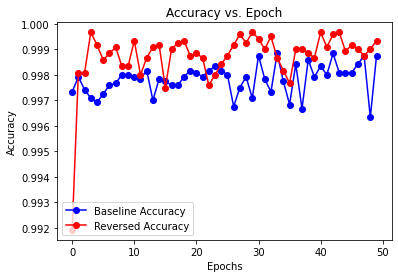

In [90]:
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'], "b-o")
plt.plot(history1.history['val_accuracy'], "r-o")
plt.title('Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Baseline Accuracy', 'Reversed Accuracy'], loc='lower left')
plt.show()

Setting ylim to 0

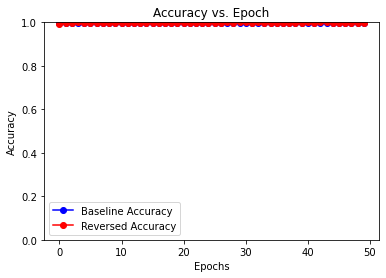

In [94]:
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'], "b-o")
plt.plot(history1.history['val_accuracy'], "r-o")
plt.ylim(ymin=0)
plt.title('Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Baseline Accuracy', 'Reversed Accuracy'], loc='lower left')
plt.show()